In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('diabetes_final.csv')

In [4]:
df.head(5)

,Unnamed: 0,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Outcome,pregnancies_categories_0 - 3,pregnancies_categories_4- 8,pregnancies_categories_9 - 12,pregnancies_categories_13 - 17,age_categories_20 - 24,age_categories_25 - 29,age_categories_30-39,age_categories_40 - 49,age_categories_50 - 59,age_categories_60 - 69,age_categories_70 - 81
0,0,0.670968,0.489796,0.314928,0.234415,1,0,1,0,0,0,0,0,1,0,0,0
1,1,0.264516,0.428571,0.171779,0.116567,0,1,0,0,0,0,0,1,0,0,0,0
2,2,0.896774,0.408163,0.104294,0.253629,1,0,1,0,0,0,0,1,0,0,0,0
3,3,0.290323,0.428571,0.202454,0.038002,0,1,0,0,0,1,0,0,0,0,0,0
4,4,0.600000,0.163265,0.509202,0.943638,1,1,0,0,0,0,0,1,0,0,0,0


In [5]:
df.drop(columns = ['Unnamed: 0'], axis = 1, inplace = True)

In [6]:
df.head()

,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Outcome,pregnancies_categories_0 - 3,pregnancies_categories_4- 8,pregnancies_categories_9 - 12,pregnancies_categories_13 - 17,age_categories_20 - 24,age_categories_25 - 29,age_categories_30-39,age_categories_40 - 49,age_categories_50 - 59,age_categories_60 - 69,age_categories_70 - 81
0,0.670968,0.489796,0.314928,0.234415,1,0,1,0,0,0,0,0,1,0,0,0
1,0.264516,0.428571,0.171779,0.116567,0,1,0,0,0,0,0,1,0,0,0,0
2,0.896774,0.408163,0.104294,0.253629,1,0,1,0,0,0,0,1,0,0,0,0
3,0.290323,0.428571,0.202454,0.038002,0,1,0,0,0,1,0,0,0,0,0,0
4,0.600000,0.163265,0.509202,0.943638,1,1,0,0,0,0,0,1,0,0,0,0


In [7]:
from sklearn.preprocessing import PolynomialFeatures

In [9]:
real_features = df.iloc[:, 0:4]

In [19]:
poly = PolynomialFeatures(degree = 2, interaction_only = True)

In [20]:
poly_nomialfeatuers = poly.fit_transform(real_features)
#creating interaction variables by using polynomial features

In [25]:
poly.get_feature_names(real_features.columns)

['1',
 'Glucose',
 'BloodPressure',
 'BMI',
 'DiabetesPedigreeFunction',
 'Glucose BloodPressure',
 'Glucose BMI',
 'Glucose DiabetesPedigreeFunction',
 'BloodPressure BMI',
 'BloodPressure DiabetesPedigreeFunction',
 'BMI DiabetesPedigreeFunction']

In [27]:
interactions_df = pd.DataFrame(poly_nomialfeatuers, columns = poly.get_feature_names(real_features.columns))

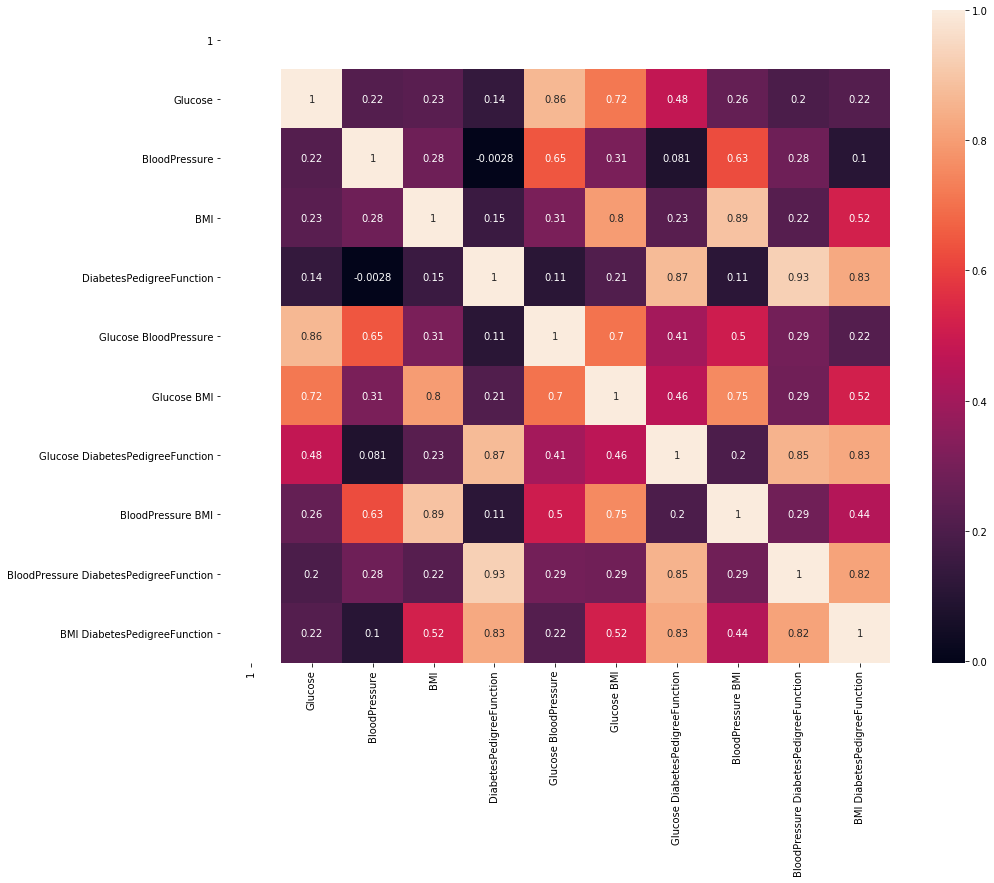

In [34]:
plt.figure(figsize = (15, 12))
sns.heatmap(interactions_df.corr(), annot = True)
#DiabetesPedigreeFunction is highly correlated with diabetesPedigreefunction x BloodPressure, so drop latter

In [35]:
interactions_df.drop(columns = ['BloodPressure DiabetesPedigreeFunction'], axis = 1, inplace = True)

In [36]:
interactions_df.head()

,1,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Glucose BloodPressure,Glucose BMI,Glucose DiabetesPedigreeFunction,BloodPressure BMI,BMI DiabetesPedigreeFunction
0,1.0,0.670968,0.489796,0.314928,0.234415,0.328637,0.211307,0.157285,0.154251,0.073824
1,1.0,0.264516,0.428571,0.171779,0.116567,0.113364,0.045438,0.030834,0.073620,0.020024
2,1.0,0.896774,0.408163,0.104294,0.253629,0.366030,0.093529,0.227448,0.042569,0.026452
3,1.0,0.290323,0.428571,0.202454,0.038002,0.124424,0.058777,0.011033,0.086766,0.007694
4,1.0,0.600000,0.163265,0.509202,0.943638,0.097959,0.305521,0.566183,0.083135,0.480503


In [38]:
df.shape[1]

16

In [41]:
#Combining interactions_df with other dummy variables in one model 
complete_df = pd.concat([interactions_df, df.iloc[:, 4:16]], axis = 1)

In [44]:
complete_df.drop(columns = ['1'], axis = 1, inplace = True)

##### Dealing with Class Imbalance

In [55]:
complete_df.Outcome.value_counts() #There is a class imblance of 500 to 268 with the majority being 0

0    500
1    268
Name: Outcome, dtype: int64

In [56]:
from sklearn.utils import resample

In [57]:
df_majority = complete_df[complete_df.Outcome == 0]
df_minority = complete_df[complete_df.Outcome == 1]

In [58]:
df_minority_upsampled = resample(df_minority, replace = True, n_samples = 500, random_state = 99)

In [59]:
df_final = pd.concat([df_majority, df_minority_upsampled])

In [60]:
df_final.Outcome.value_counts() #Now classes are balanced 

1    500
0    500
Name: Outcome, dtype: int64

In [61]:
df_final.to_csv('diabetes_resampled.csv')